# Pyplot
* Vi ser nøyere på plotting:
  - subplot
  - stolpediagram
  - kakediagram

## Subplot - Flere typer grafer/plot i samme figur
* Vi kan lage subplot med matplotlib
* Vi kaller da `plt.subplot(«antall rader», «antall kolonner», «plotnummer»)`

### Eksempel (Med curve_fit)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

tid_aar = list(range(2001,2024))
brukere = np.array([400e3, 796e3, 1.41e6, 2.48e6, 4.02e6,6.15e6,7.32e6,9.16e6,11.89e6,
           18.26e6,24.30e6,30.36e6,41.43e6,54.47e6,70.83e6,89.09e6,110.64e6,139.25e6,
           167.09e6,203.66e6,221.84e6,230.75e6,260.28e6])


In [26]:
from scipy.optimize import curve_fit
from scipy.stats import norm

start_t = 2001
slutt_t = 2023
n_t = slutt_t-start_t #Antall år

tid0 = np.linspace(0,n_t, n_t+1)
print(tid0)

def logistic_function(t,K,r):
    P0 = 400e3
    A = (K-P0)/P0
    return K/(1+A*np.exp(-r*t))

def sjekk_parametre():
    K = np.linspace(25e8, 35e8, 10)
    r = np.linspace(0.2,0.4,3)
    for Ki in K:
        plt.figure(figsize=(15,5))
        for i,ri in enumerate(r):
            plt.subplot(1,3,i+1)
            plt.plot(tid0, logistic_function(tid0,Ki,ri))
            plt.plot(tid0, brukere, 'o')
            plt.title(f"r = {ri} ,K={Ki}")
        plt.show()
    # r = 0.3 og K = 30e8 ser fornuftig ut
    return None

#sjekk_parametre()

#plt.plot(tid0, brukere)
#plt.show()

params, cov = curve_fit(logistic_function, tid0, brukere, p0=[30e8, 0.3])
print("Printparams)
standard_avvik = np.sqrt(np.diag(cov))
print(standard_avvik)

K_mean = params[0]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22.]
[2.92637737e+08 3.85395202e-01]
[5.60400866e+06 2.29649861e-03]


**Studer nøye hvordan vi plottet figuren i forrige eksempel**

## Lånekalkulator: Stolpediagram og Kakediagram
* Tidligere lagde vi denne lånekalkulatoren

Hva er ønsket terminbelop? 1000


Gyldig terminbeløp gitt -- kalkulering fortsetter


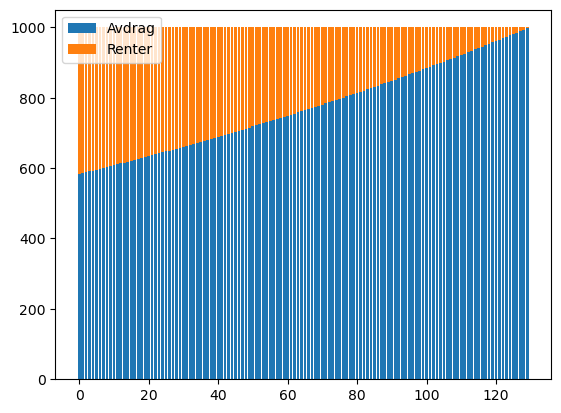

Nedbetalingstiden på 11 år og 10 måneder er for lenge
Renter [4837.334296557354, 4470.878725276828, 4085.674591480256, 3680.7626831267617, 3255.134713066989, 2807.730808267409, 2337.4368705785837, 1843.0818024753253, 1323.43459086045, 777.2012416704074]


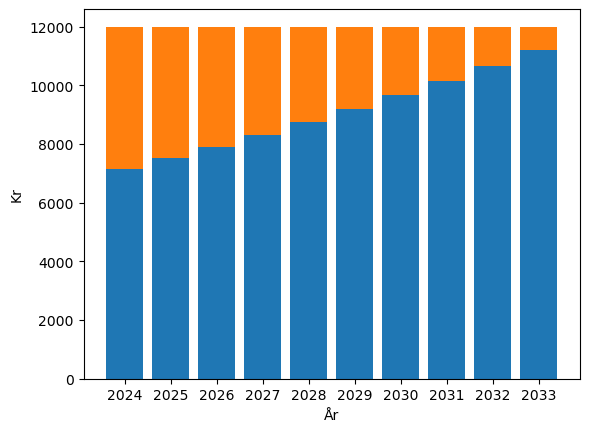

In [11]:
# Annuitetslån
import matplotlib.pyplot as plt

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = laan*rentesats/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True
    
if sjekk_terminbelop(terminbelop, rentesats, laan):
    print("Gyldig terminbeløp gitt -- kalkulering fortsetter")
    avdragsliste = []
    renteliste = []
    mnd = 0
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        #laan -= termterminbelop
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1
        #mnd = mnd +1

    tid_liste = list(range(mnd))

    plt.bar(tid_liste, avdragsliste, label="Avdrag")
    plt.bar(tid_liste, renteliste, label="Renter", bottom=avdragsliste)
    plt.legend()
    plt.show()
    
    if mnd/12 > max_nedbetalingstid:
        print(f"Nedbetalingstiden på {mnd/12:.0f} år og {mnd%12} måneder er for lenge")
    
    avdrag_aarlig = []
    renter_aarlig = []
    
    n_aar = mnd//12
    aar_liste = list(range(n_aar))
    
    for aar in aar_liste:
        avdrag = avdragsliste[aar*12:(aar+1)*12]
        renter = renteliste[aar*12:(aar+1)*12]
        avdrag_aarlig.append(sum(avdrag))
        renter_aarlig.append(sum(renter))
    
    print("Renter", renter_aarlig)
    
    startaar = 2024
    aarstall_liste = []
    for y in aar_liste:
        aarstall = f"{startaar+y}"
        aarstall_liste.append(aarstall)
        
    plt.bar(aarstall_liste, avdrag_aarlig, label="Avdrag")
    plt.bar(aarstall_liste, renter_aarlig, label="Renter", bottom=avdrag_aarlig)
    plt.xlabel("År")
    plt.ylabel("Kr")
    plt.show()
    
    
else:
    print("Ugyldig terminbeløp gitt -- programmet stopper")






* Den kan vi jobbe mer med

# Histogram

Listen inneholder data om 2000 kunder.
For hver kunde har vi data om ['fornavn', 'etternavn', 'startsaldo']
